In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Open IIT DA 2021


/content/drive/.shortcut-targets-by-id/1FmqUtHqXjOsF1btGtFibwcKqHS_R0EkZ/Open IIT DA 2021


In [7]:
df1=pd.read_csv("./Train_data.csv")
print(df1.shape)
df0=df1.copy()
df1.head()

(12227, 17)


,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


Counter({'very low': 3222, 'low': 3118, 'average': 2912, 'high': 2606, 'very high': 369})


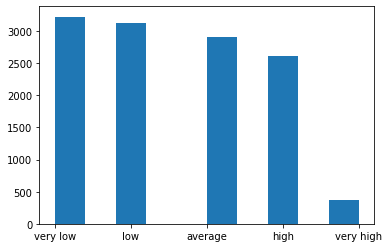

In [8]:
from collections import Counter
counter = Counter(df1.popularity)
print(counter)
plt.hist(df1.popularity)
plt.xticks(ticks=[0,1,2,3,4],labels=['very low','low','average','high','very high'])
plt.show()

imbalanced distribution of dataset

In [9]:
df1['date']=[int(x.split("-")[0]) for x in df1.release_date]
df1['month']=[int(x.split("-")[1]) for x in df1.release_date]
df2=df1.drop(columns=['release_date']).copy()

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

l=LabelEncoder()
df2['mode']=l.fit_transform(df2['mode'])
l=LabelEncoder()
df2['explicit']=l.fit_transform(df2['explicit'])

df2.head(3)

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,date,month
0,2015,0.949,0.235,0.0276,0,0.9270,5,0.513,-27.398,0,0.0381,110.838,0.0398,1947,3.0,very low,1,1
1,15901,0.855,0.456,0.4850,0,0.0884,4,0.151,-10.046,0,0.0437,152.066,0.8590,2020,2.4,low,13,11
2,9002,0.827,0.495,0.4990,0,0.0000,0,0.401,-8.009,1,0.0474,108.004,0.7090,1950,2.6,very low,1,1


In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
lst=df2.drop(columns=['popularity']).columns
x=df2.drop(columns=['popularity'])

X,y= oversample.fit_resample(x,df2.popularity)
df=pd.DataFrame(X)
df.columns=lst
df['popularity']=y

df.date=df.date.astype('int')
df.month=df.month.astype('int')
df.year=df.year.astype('int')
df.loc[df['mode']>.5,'mode']=1
df.loc[df['mode']<.5,'mode']=0
df.loc[df['explicit']>.5,'explicit']=1
df.loc[df['explicit']<.5,'explicit']=0
df=df.drop(columns=['id'])
df['num_popularity']=df.popularity.replace({'very low':1,'low':2,'average':3,'high':4,'very high':5})

df.shape

(16110, 18)

In [11]:
df.head(3)

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,date,month,popularity,num_popularity
0,0.949,0.235,0.0276,0.0,0.9270,5.0,0.513,-27.398,0.0,0.0381,110.838,0.0398,1947,3.0,1,1,very low,1
1,0.855,0.456,0.4850,0.0,0.0884,4.0,0.151,-10.046,0.0,0.0437,152.066,0.8590,2020,2.4,13,11,low,2
2,0.827,0.495,0.4990,0.0,0.0000,0.0,0.401,-8.009,1.0,0.0474,108.004,0.7090,1950,2.6,1,1,very low,1


Counter({'very low': 3222, 'low': 3222, 'average': 3222, 'high': 3222, 'very high': 3222})


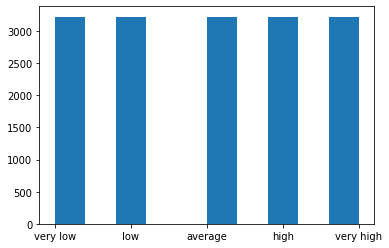

In [12]:
counter = Counter(df.popularity)
print(counter)
plt.hist(df.popularity)
plt.xticks(ticks=[0,1,2,3,4],labels=['very low','low','average','high','very high'])
plt.show()

##Correlational table of the R values 

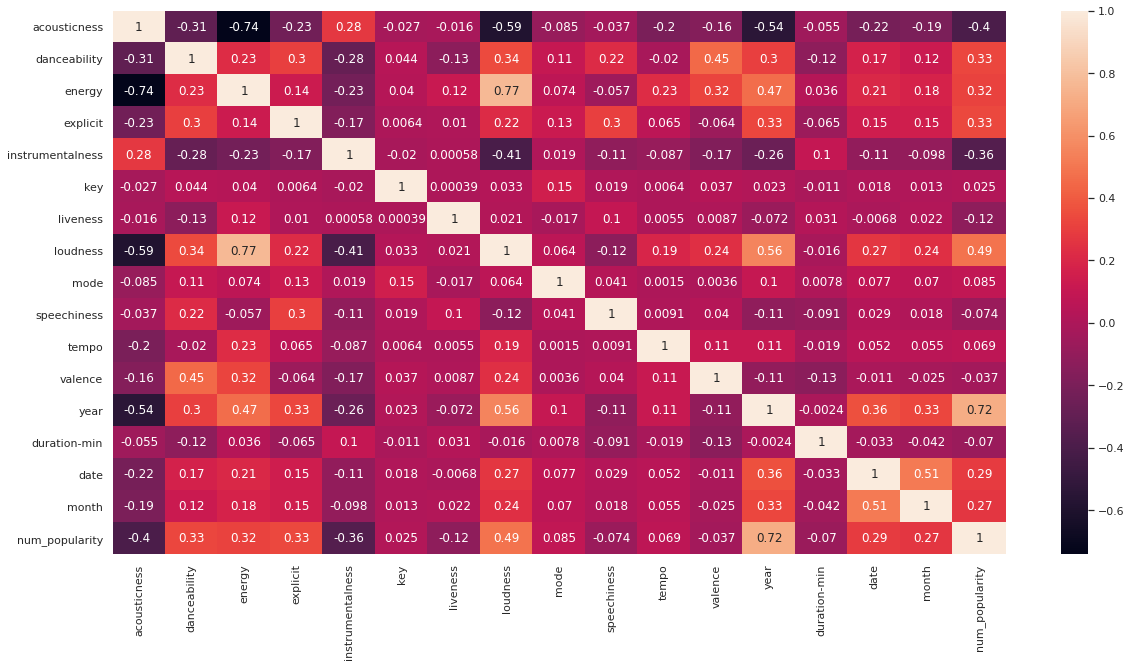

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot = True)

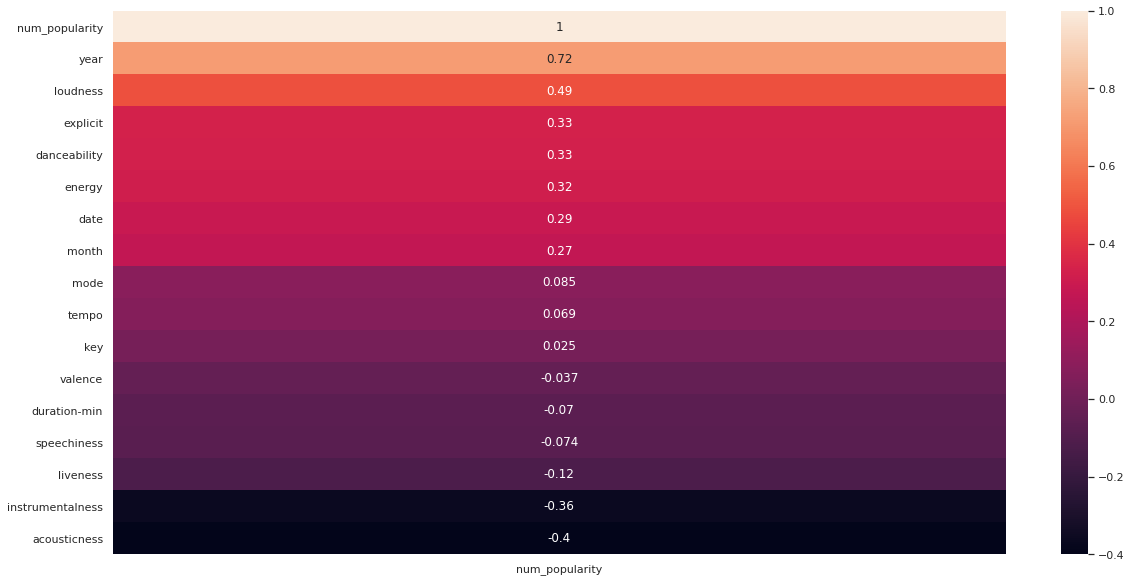

In [14]:
sns.heatmap(df.corr()[['num_popularity']].sort_values(by=['num_popularity'],ascending=False),annot=True)

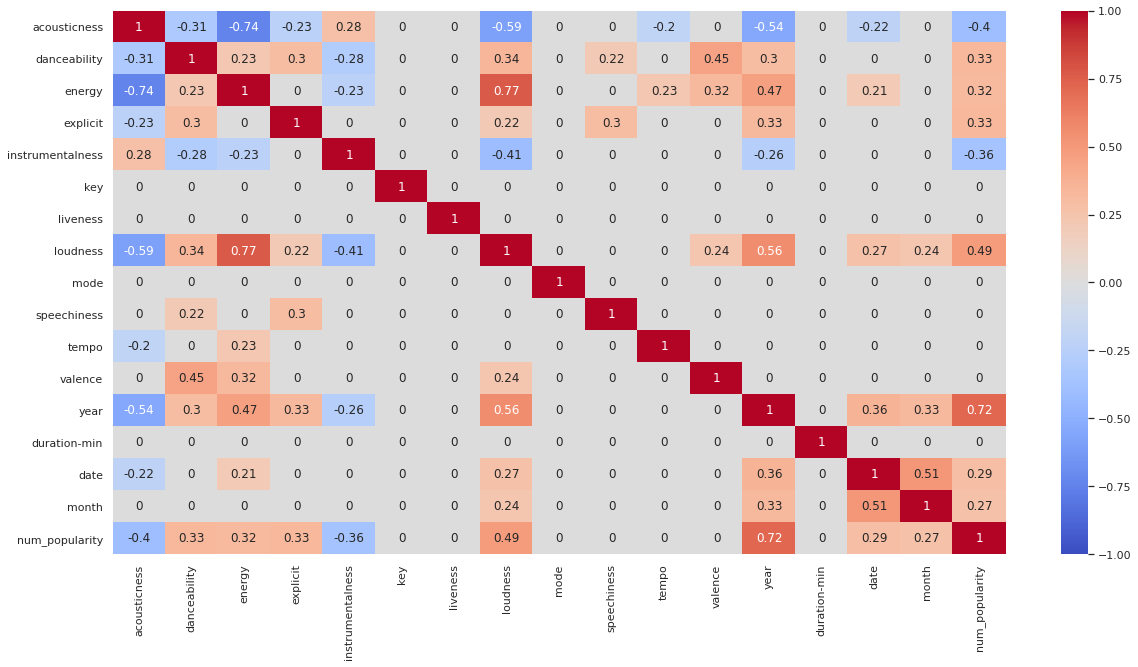

In [15]:
subjective_corr = df.corr()
subjective_corr[np.abs(subjective_corr)<.2 ] = 0
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

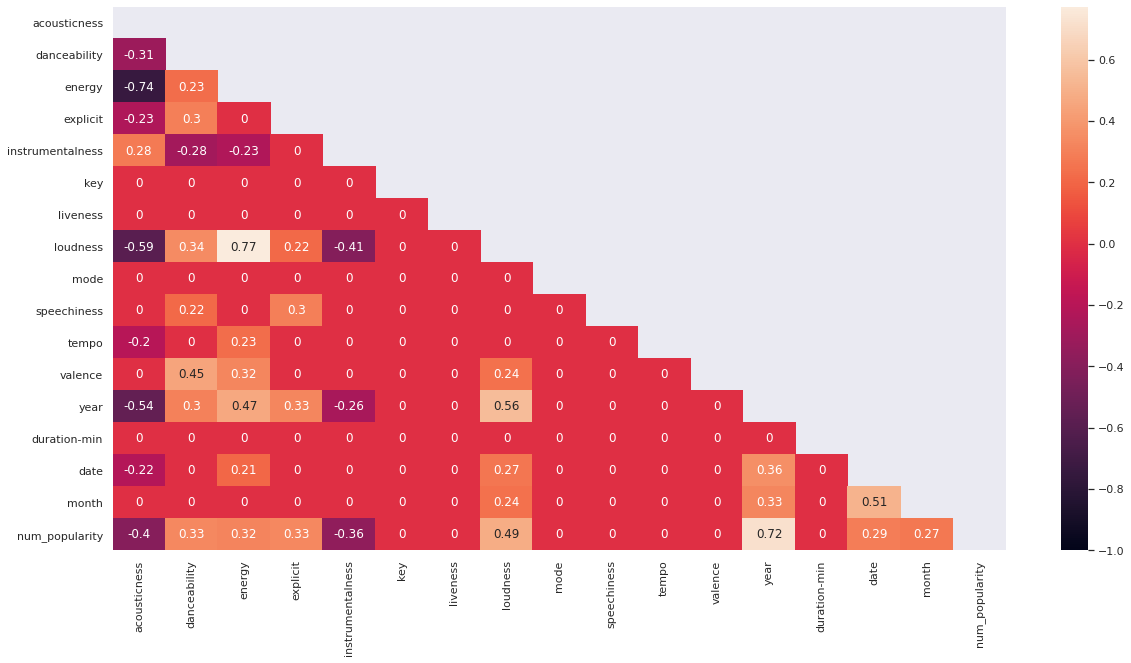

In [16]:
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(subjective_corr,
            vmin=-1,
            annot=True,
            mask = mask);

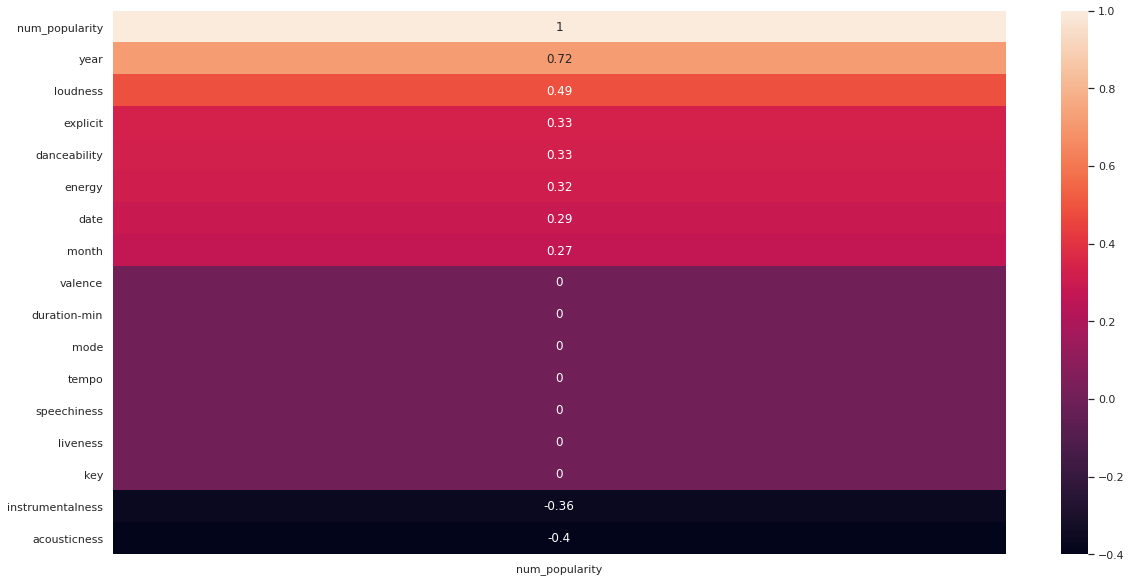

In [17]:
sns.heatmap(subjective_corr[['num_popularity']].sort_values(by=['num_popularity'],ascending=False),annot=True)

##Correlational table of the R^2 values 

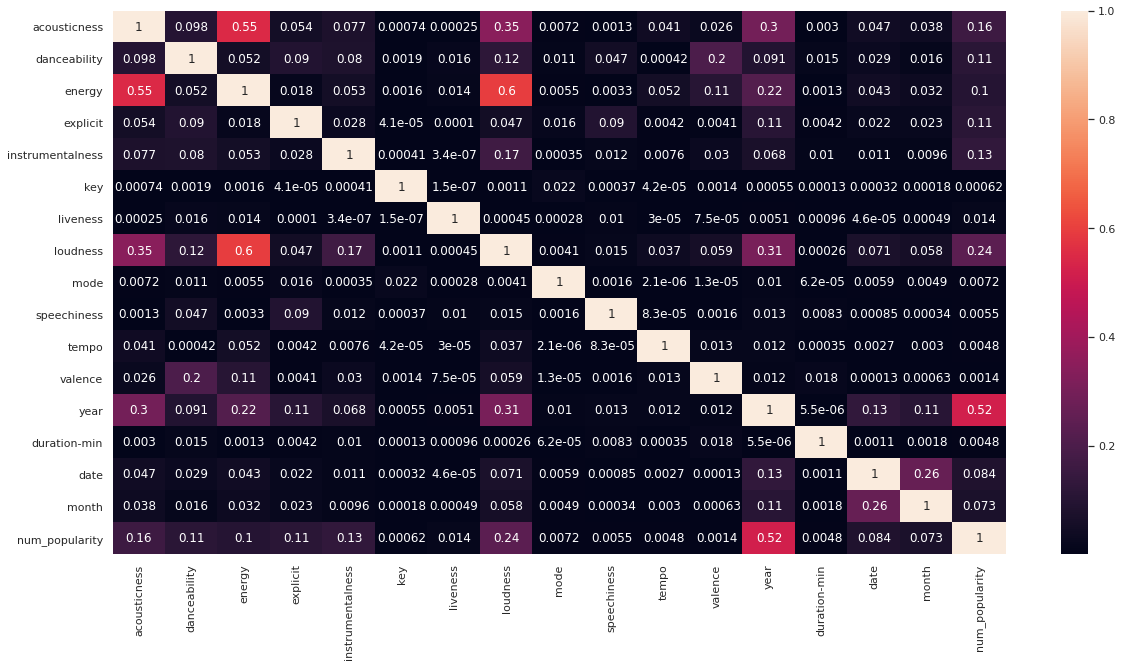

In [18]:
sns.heatmap(df.corr()**2, annot = True)

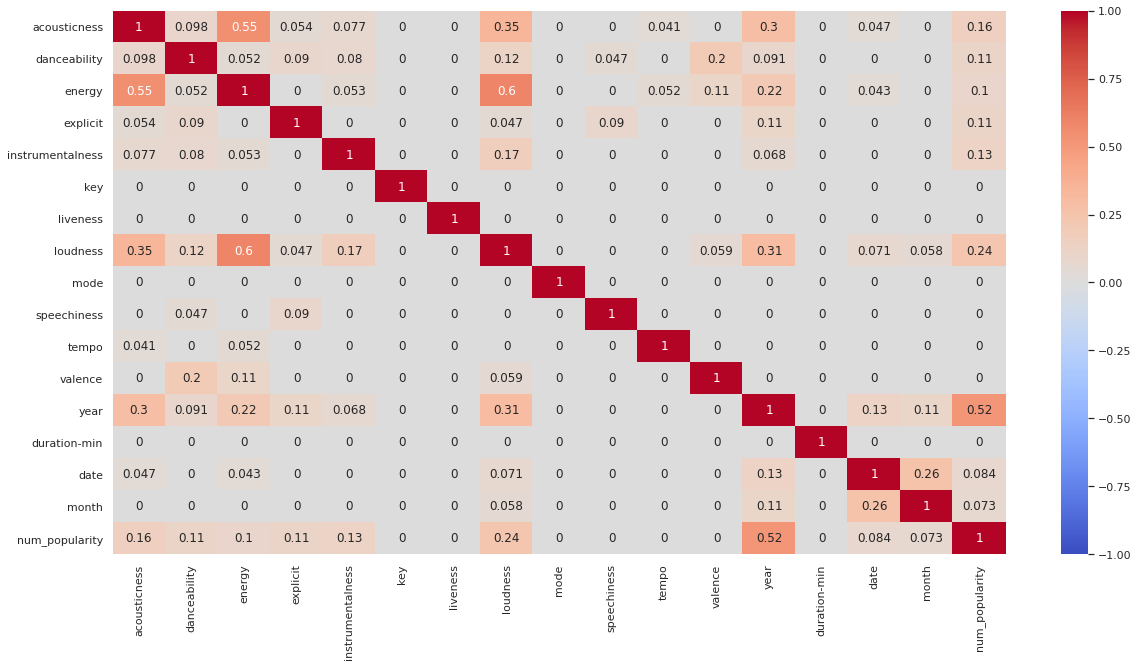

In [19]:
subjective_corr = df.corr()**2
subjective_corr[np.abs(subjective_corr)<.04 ] = 0
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

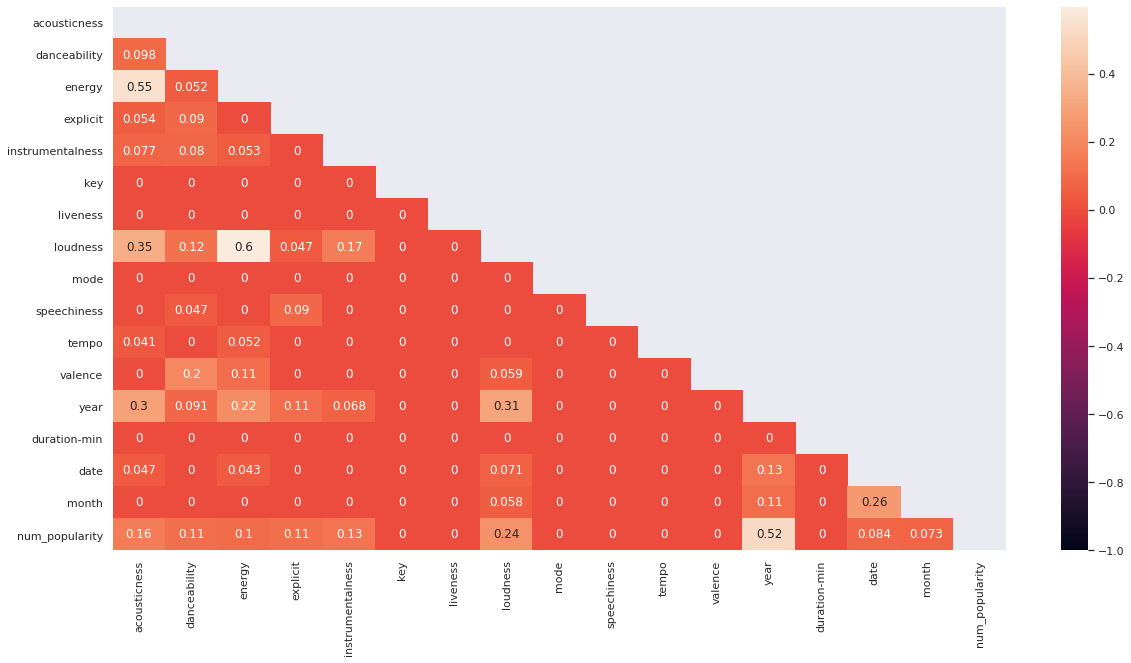

In [20]:
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(subjective_corr,
            vmin=-1,
            annot=True,
            mask = mask);

:: energy and acousticness, loudness are much correlated to one another

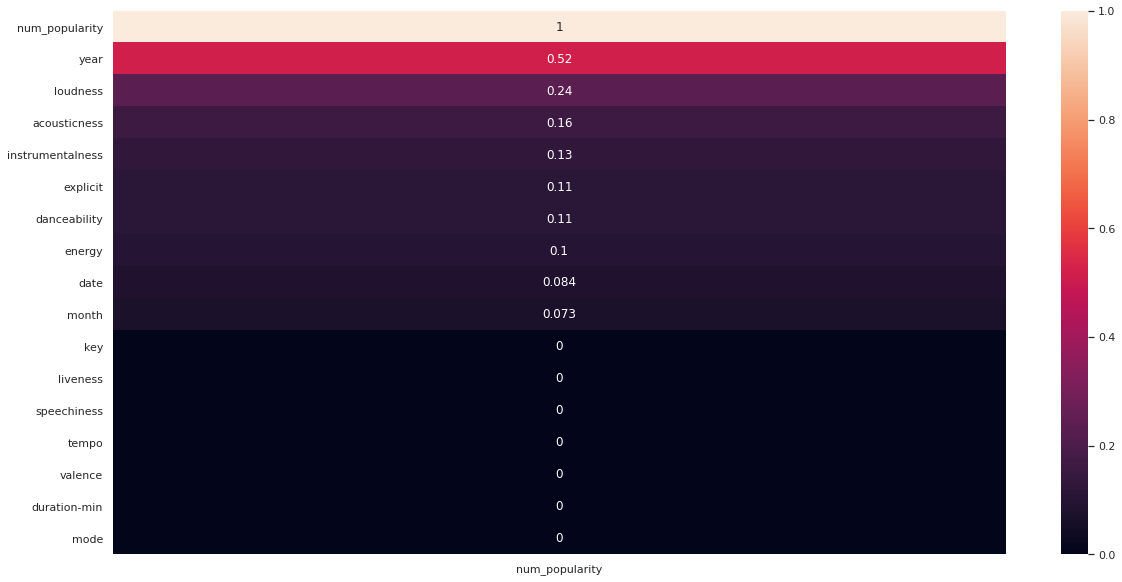

In [21]:
sns.heatmap(subjective_corr[['num_popularity']].sort_values(by=['num_popularity'],ascending=False),annot=True)

:: popularity is more dependent on year of release, loudness, acousticness, energy, instrumentalness, explicit, danceability of the music

where 

explicit is categorical column with 0-> Major, 1-> Minor

acousticness,	energy,	instrumentalness,	danceability	are in range from 0-1

#individual columns

In [22]:
sns.set(rc={'figure.figsize':(16,6)})

def scatter_plot(x,y):
  plt.figure()
  plt.scatter(df[x],df[y],alpha=.02,c='r')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

In [23]:
def hist_plot(x,y):
  plt.figure()
  plt.hist(df[x],groupby=df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score

In [25]:
x=df.drop(columns=['popularity','num_popularity']).copy()
y=df['popularity'].copy()
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2,random_state=69,shuffle=True)

model=RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',max_depth=4,random_state=69)
model.fit(x_train,y_train)
y_pred_f=model.predict(x_test)
y_true_f=y_test.copy()
score=0
print(f1_score(y_true_f,y_pred_f,average='macro'))
print(accuracy_score(y_true_f,y_pred_f))

0.5457517103432674
0.5747982619490999


baseline accuracy increased

###year

In [26]:
df.year.describe()

count    16110.000000
mean      1990.913160
std         26.079356
min       1920.000000
25%       1972.000000
50%       1996.000000
75%       2016.000000
max       2021.000000
Name: year, dtype: float64

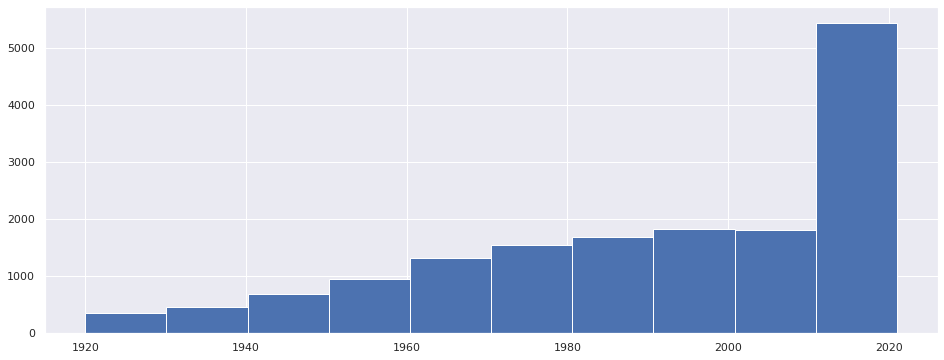

In [27]:
plt.hist(df.year)
plt.show()

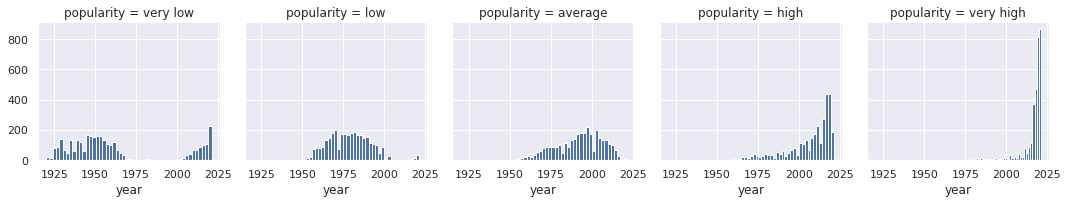

In [28]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'year',bins=50)

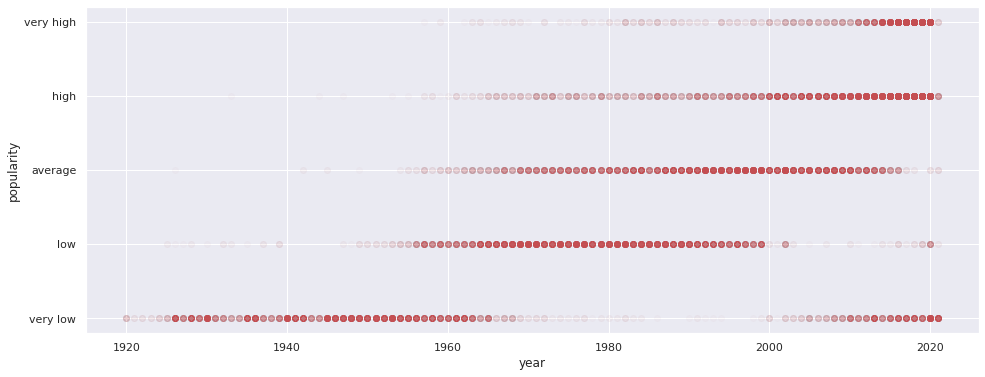

In [29]:
scatter_plot('year','popularity')

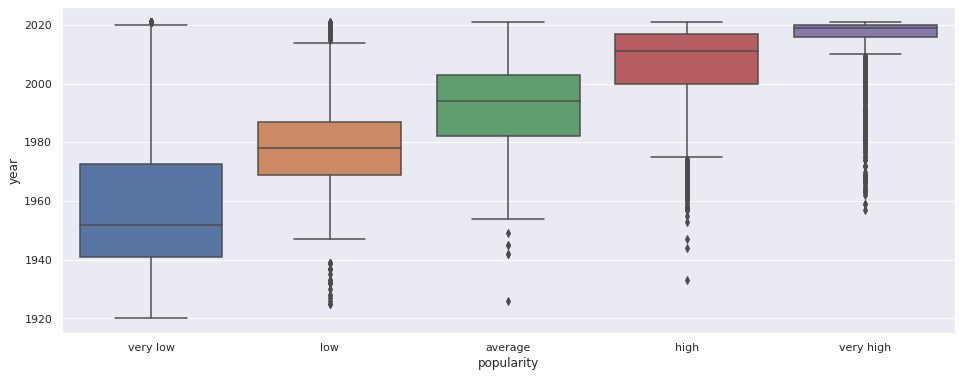

In [30]:
sns.boxplot(x=df['popularity'],y=df['year'])

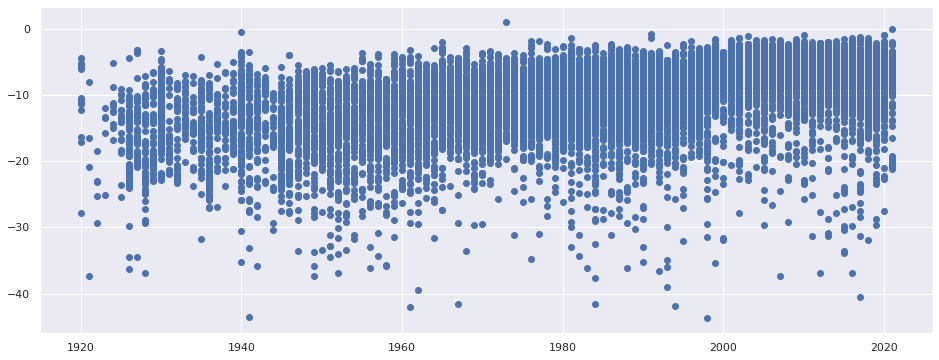

In [31]:
plt.scatter(y=df.loudness,x=df.year)

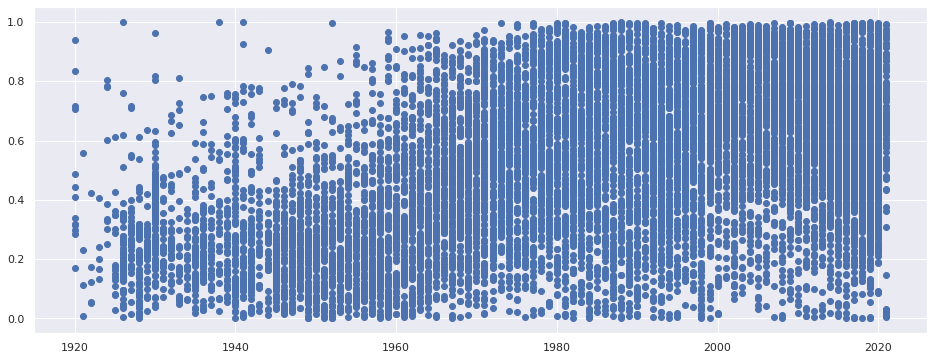

In [32]:
plt.scatter(y=df.energy,x=df.year)

:: year dependency with popularity

it is observable to say that most of the lesser popular songs were built in previous years whereas with time proceeds there were more amount of of more popular music

:: **previous years** music had lesser popularity

###loudness

In [33]:
df.loudness.describe()

count    16110.000000
mean        -9.819347
std          5.206033
min        -43.738000
25%        -12.431538
50%         -8.475500
75%         -6.041687
max          1.006000
Name: loudness, dtype: float64

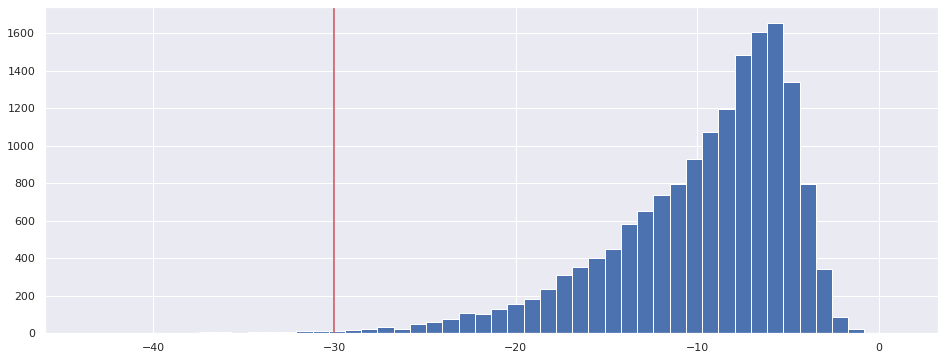

In [34]:
plt.hist(df.loudness,bins=50)
plt.axvline(-30,c='r')
plt.show()

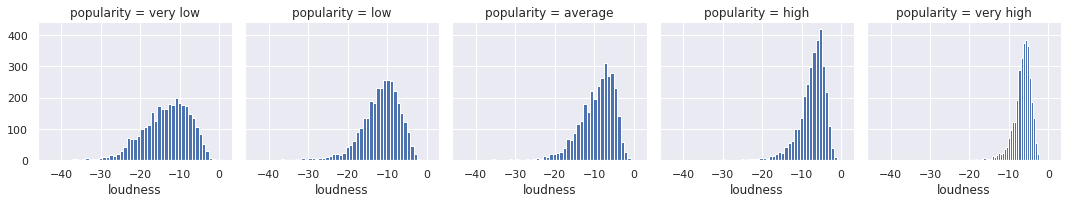

In [35]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'loudness',bins=50)

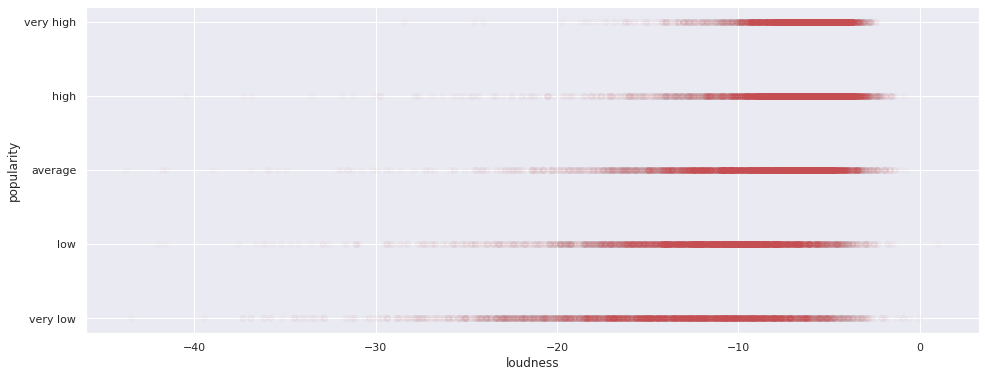

In [36]:
scatter_plot('loudness','popularity')

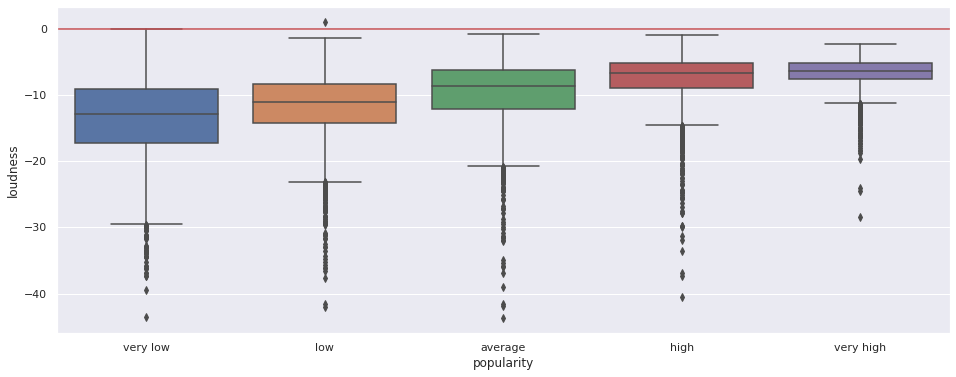

In [37]:
sns.boxplot(x=df['popularity'],y=df['loudness'])

plt.axhline(0,color='r')

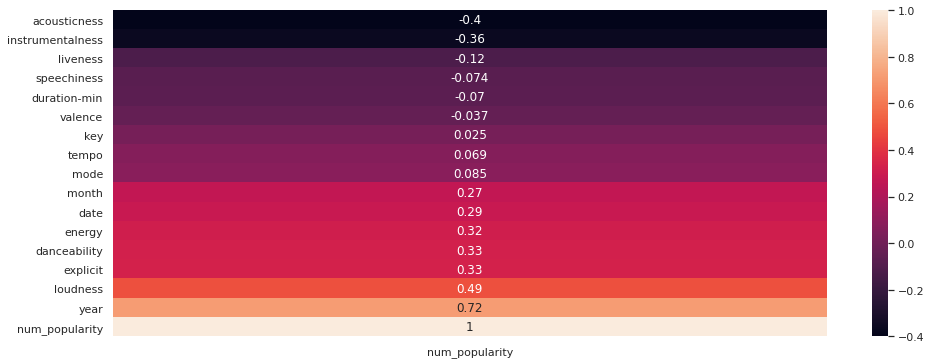

In [38]:
df3=df[df['loudness']<0].copy()

sns.heatmap(df3.corr()[['num_popularity']].sort_values(['num_popularity']), annot = True)

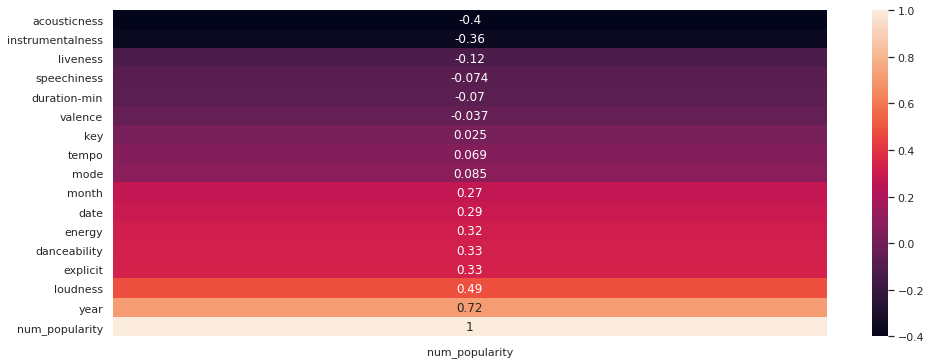

In [39]:
sns.heatmap(df.corr()[['num_popularity']].sort_values(['num_popularity']), annot = True)

In [40]:
X=df3.drop(columns=['popularity','num_popularity']).copy()
y=df3['popularity'].copy()
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=69,shuffle=True)
model=RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',max_depth=4,random_state=69)
model.fit(x_train,y_train)
y_pred_f=model.predict(x_test)
y_true_f=y_test.copy()
score=0
print(f1_score(y_true_f,y_pred_f,average='macro'))
print(accuracy_score(y_true_f,y_pred_f))

0.540197471053566
0.5726256983240223


In [41]:
df.shape

(16110, 18)

In [42]:
df3.shape

(16109, 18)

In [43]:
df=df3.copy()

:: loudness dependency with popularity

generic increase in trend observed

:: **lesser loudness** in music tends to lesser popular

###acousticness

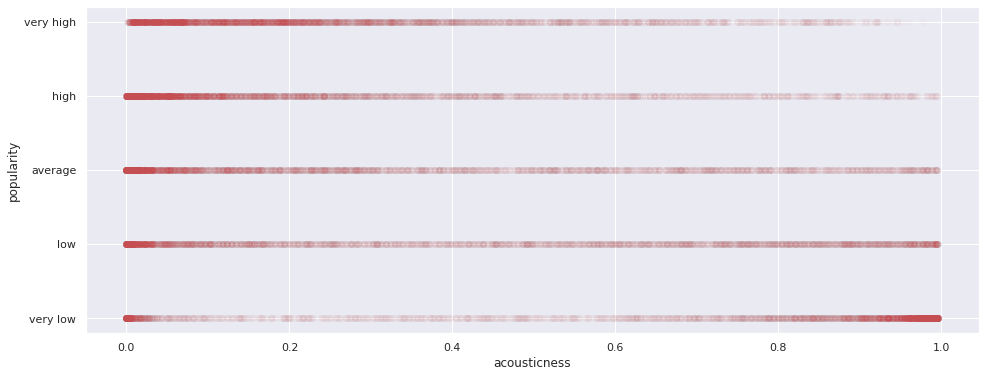

In [44]:
scatter_plot('acousticness','popularity')

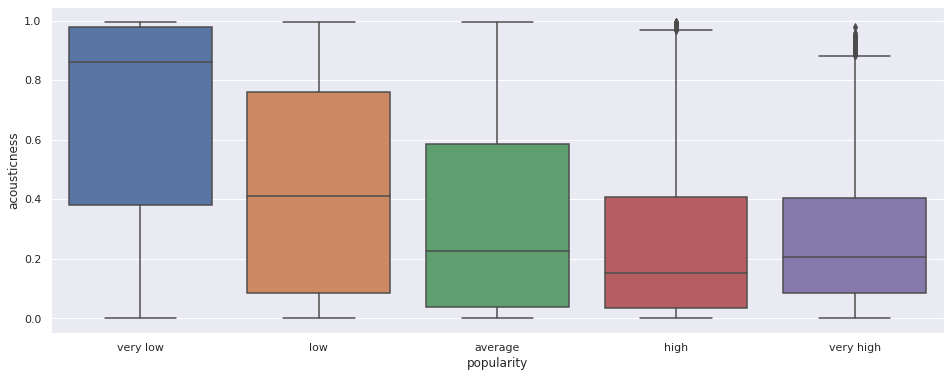

In [45]:
sns.boxplot(x=df['popularity'],y=df['acousticness'])

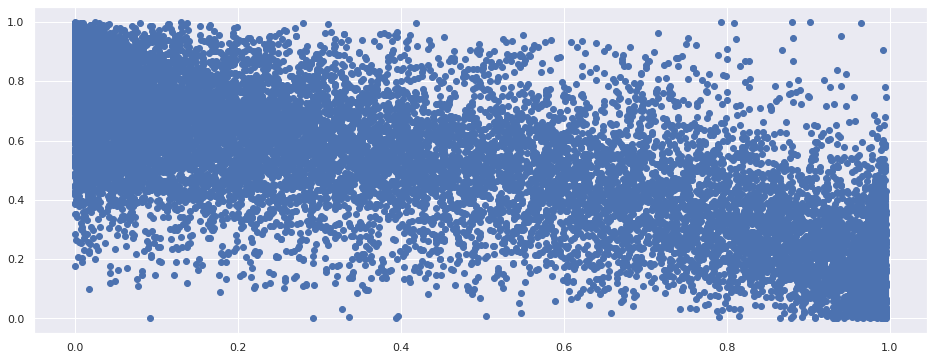

In [46]:
plt.scatter(y=df['energy'],x=df['acousticness'])
plt.show()

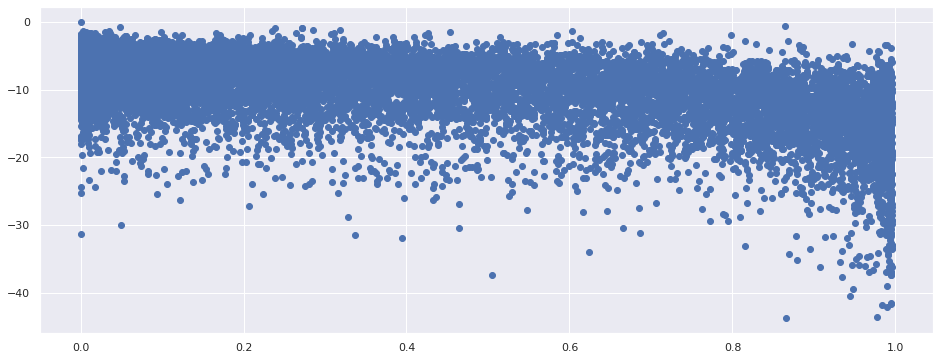

In [47]:
plt.scatter(y=df['loudness'],x=df['acousticness'])
plt.show()

In [48]:
df.acousticness.describe()

count    16109.000000
mean         0.393943
std          0.345453
min          0.000001
25%          0.068700
50%          0.290920
75%          0.716000
max          0.996000
Name: acousticness, dtype: float64

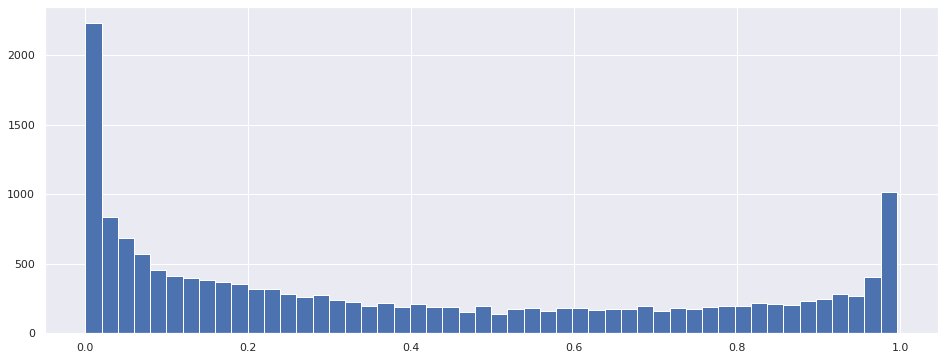

In [49]:
plt.hist(df['acousticness'],bins=50)
plt.show()

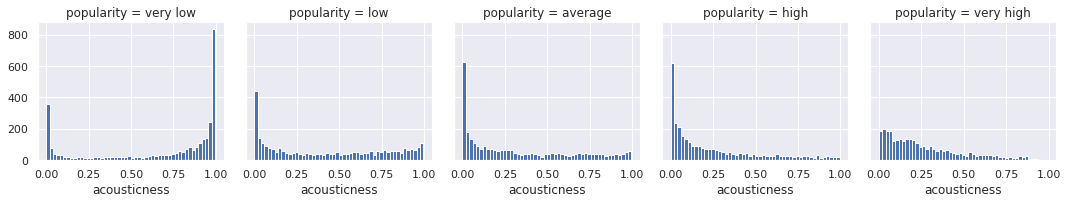

In [50]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'acousticness',bins=50)

:: acousticness dependence with popularity

"*very low*": high variance and mean of high acousticness, "*high" and "very high*": tend to pose lower variance and much lower values for acusticness

:: **more acousticness** in music tends to become less popular

###instrumentalness

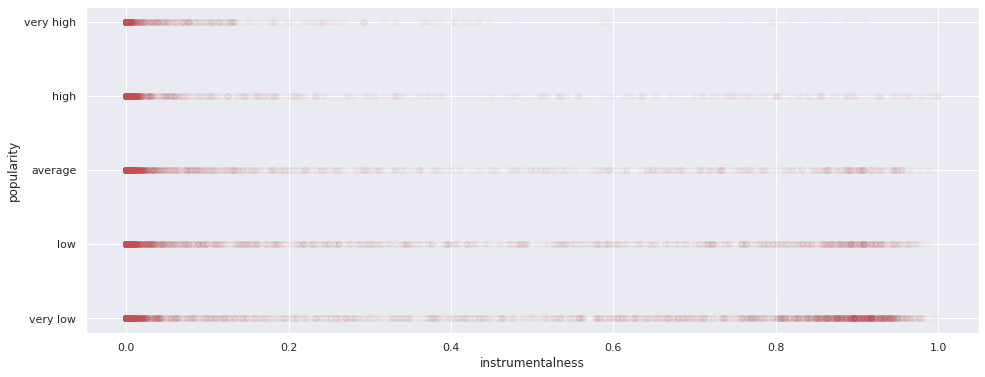

In [51]:
scatter_plot('instrumentalness','popularity')

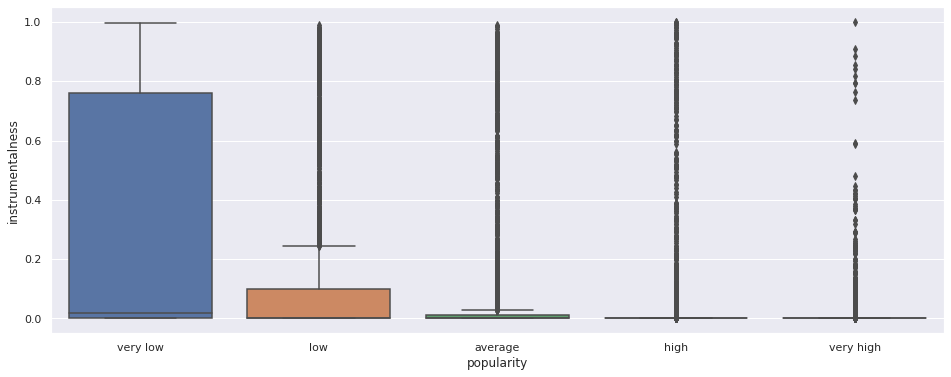

In [52]:
sns.boxplot(x=df['popularity'],y=df['instrumentalness'])

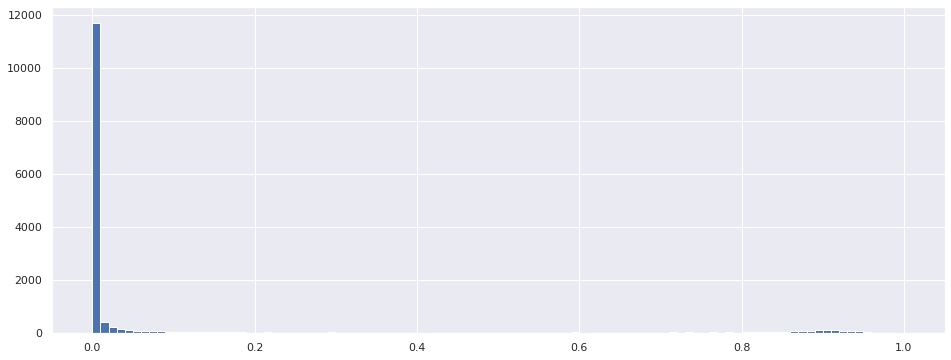

In [53]:
plt.hist(df.instrumentalness,bins=100)
plt.show()

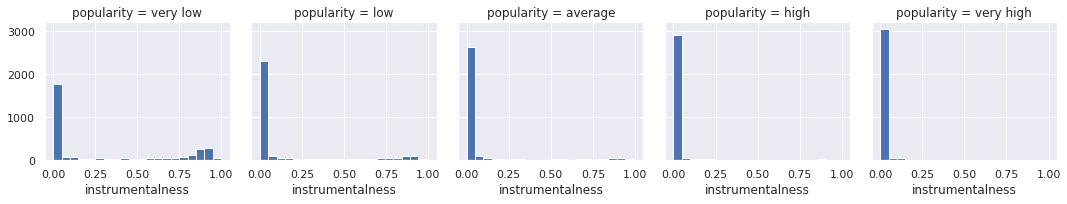

In [54]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'instrumentalness',bins=20)

In [55]:
len(df[df.instrumentalness==0])/len(df)

0.2876652802781054

:: instrumentalness dependence with popularity

generally the distribution of instrumentalness is distributed more closely to 0

:: **more instrumentalness** in music tends to become less popular

###explicit

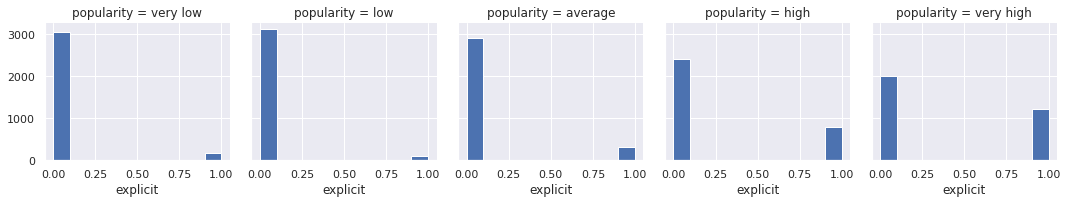

In [56]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'explicit')

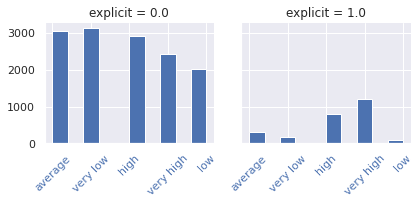

In [57]:
g=sns.FacetGrid(df, col='explicit')
g=g.map(plt.hist,'popularity')
g=g.map(plt.xticks,rotation=45)


In [58]:
print('1',df[df['num_popularity']==1].explicit.sum()*100/ len(df[df['num_popularity']==1]))
print('2',df[df['num_popularity']==2].explicit.sum()*100/ len(df[df['num_popularity']==2]))
print('3',df[df['num_popularity']==3].explicit.sum()*100/ len(df[df['num_popularity']==3]))
print('4',df[df['num_popularity']==4].explicit.sum()*100/ len(df[df['num_popularity']==4]))
print('5',df[df['num_popularity']==5].explicit.sum()*100/ len(df[df['num_popularity']==5]))
print('\nall',df.explicit.sum()*100/ len(df))

1 5.21415270018622
2 3.0425333747283454
3 9.62135319677219
4 24.767225325884542
5 37.64742396027312

all 16.059345707368553


:: The training Dataset consists of more of Major explicit music,

Minor explicit music are more frequent in high popular term

:: **Major explicit** music are lesser popular

###danceability

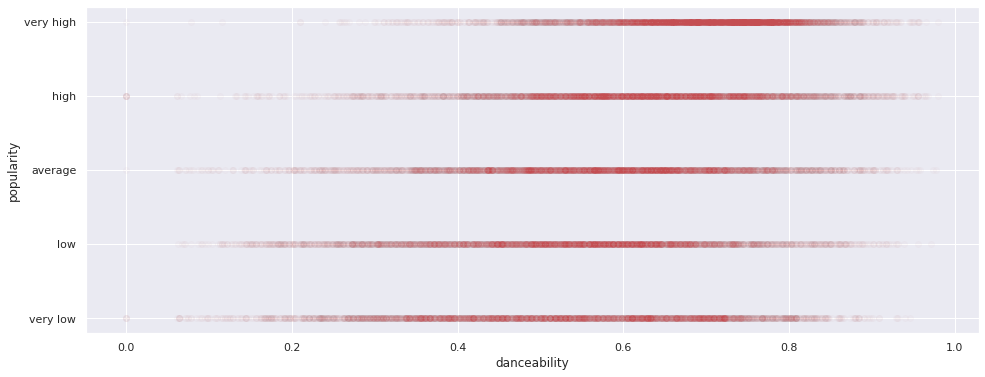

In [59]:
scatter_plot('danceability','popularity')

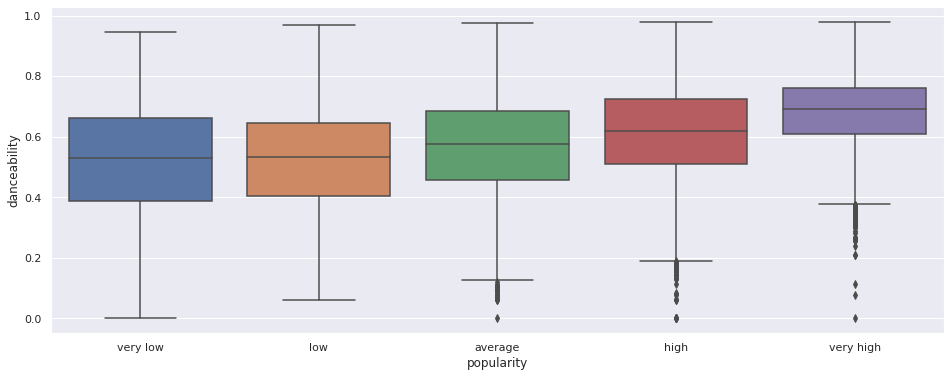

In [60]:
sns.boxplot(x=df['popularity'],y=df['danceability'])

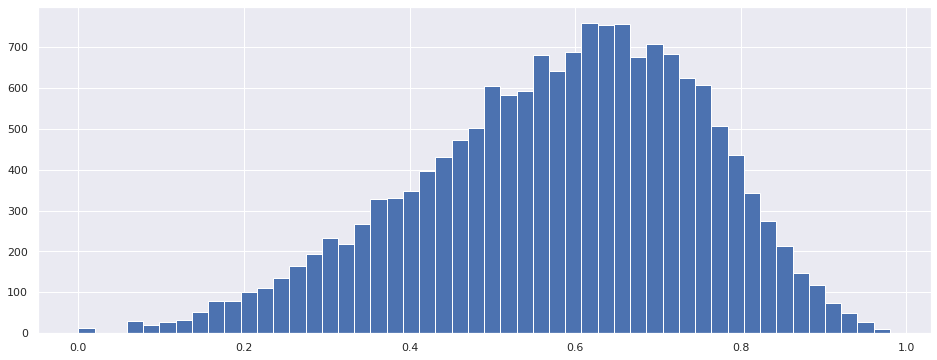

In [61]:
plt.hist(df.danceability, bins=50)

plt.show()

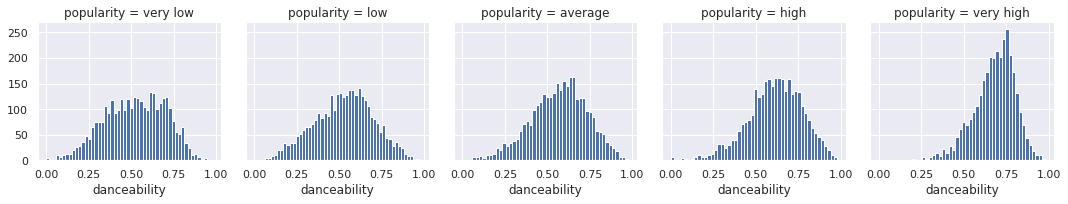

In [62]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'danceability',bins=50)

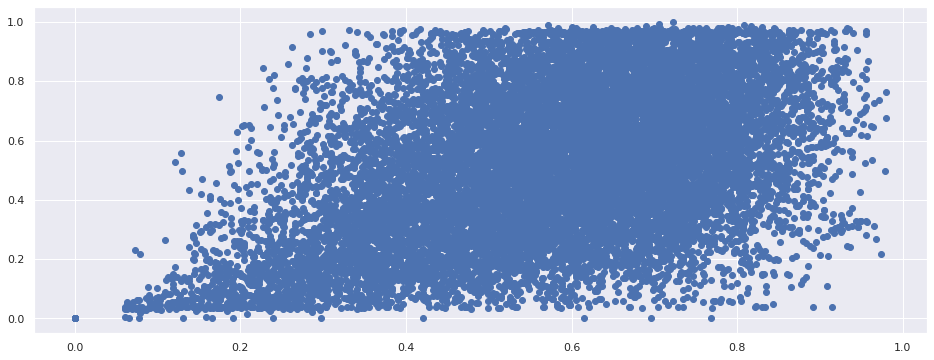

In [63]:
plt.scatter(x=df.danceability, y=df.valence)

:: danceability dependence with popularity

general trend of positive dependency

:: **lesser danceability** in music tends to become less popular

###energy

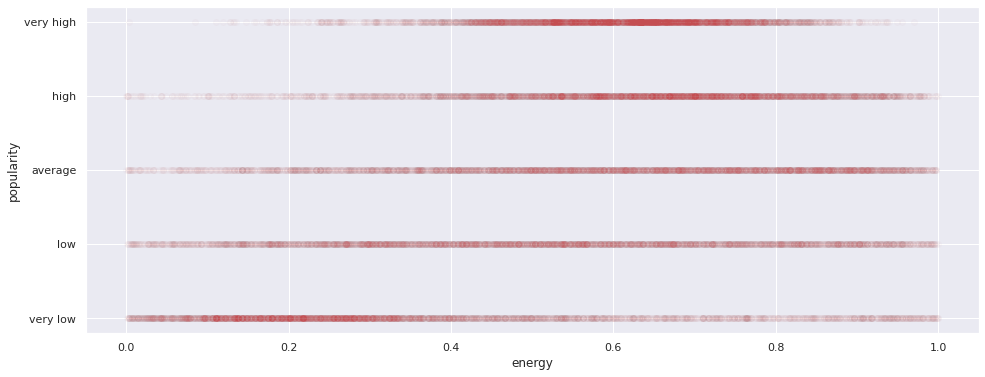

In [64]:
scatter_plot('energy','popularity')

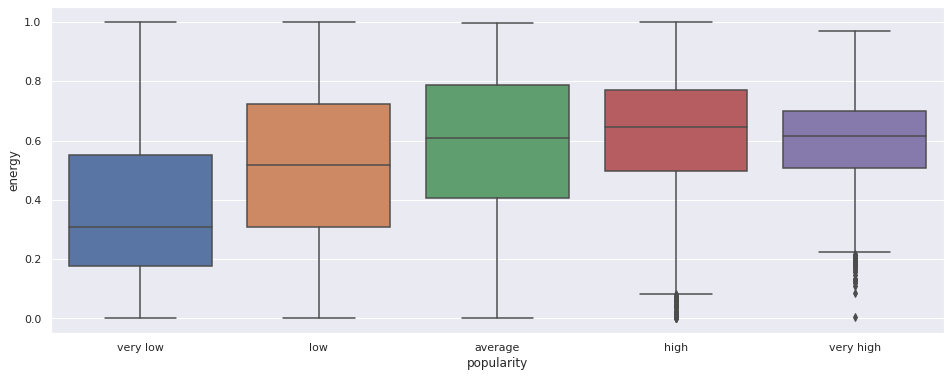

In [65]:
sns.boxplot(x=df['popularity'],y=df['energy'])

In [66]:
df.energy.describe()

count    16109.000000
mean         0.541345
std          0.243082
min          0.000020
25%          0.361000
50%          0.564000
75%          0.727735
max          1.000000
Name: energy, dtype: float64

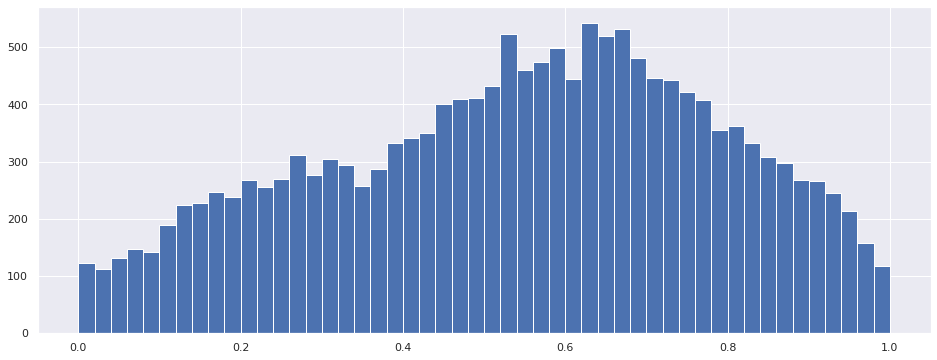

In [67]:
plt.hist(df.energy,bins=50)
plt.show()

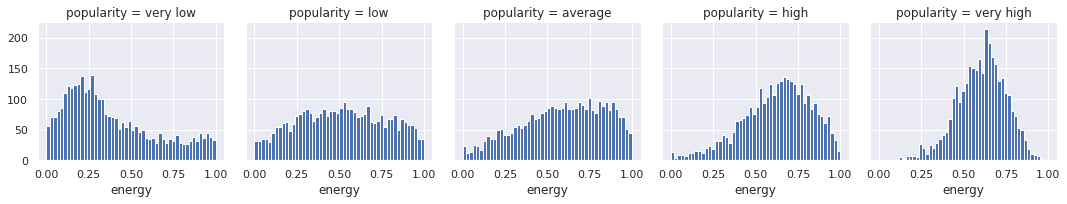

In [68]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'energy',bins=50)

:: energy dependence with popularity

general trend of positive correraltion with some outliners of very high popularity with low energy

:: **lesser energy** in music tends to become less popular

###date

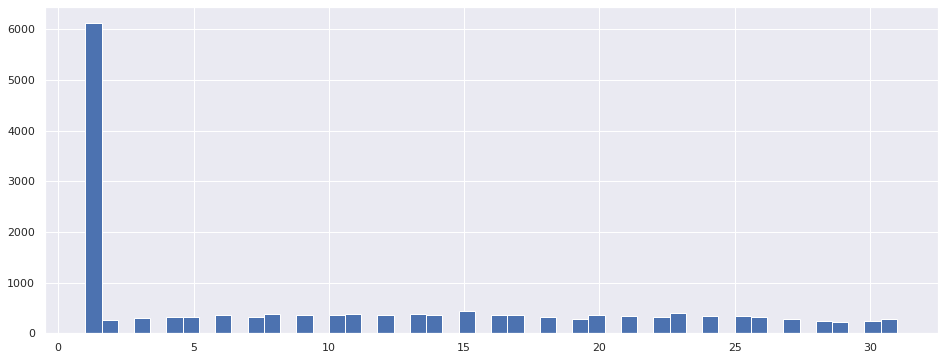

In [69]:
plt.hist(df.date,bins=50)
plt.show()

In [70]:
len(df[df.date==1])/len(df)

0.380408467316407

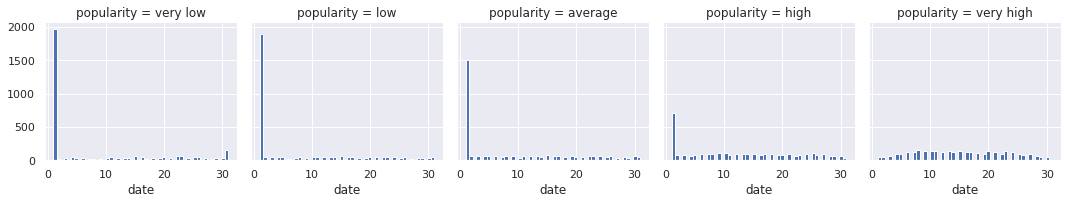

In [71]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'date',bins=50)

###month

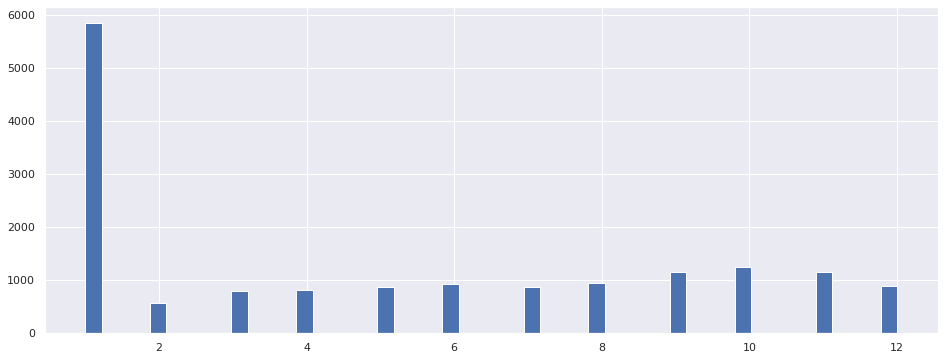

In [72]:
plt.hist(df.month,bins=50)
plt.show()

In [73]:
len(df[df3.month==1])/len(df)

0.36358557328201624

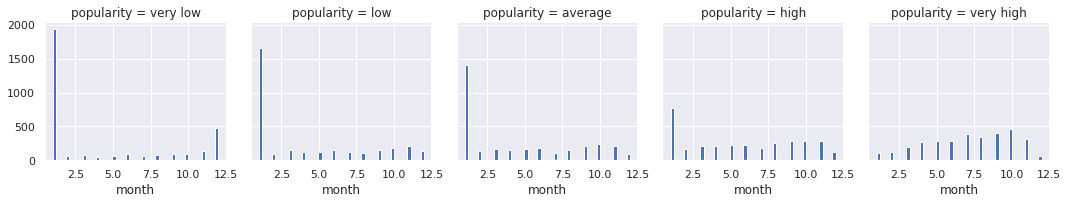

In [74]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'month',bins=50)

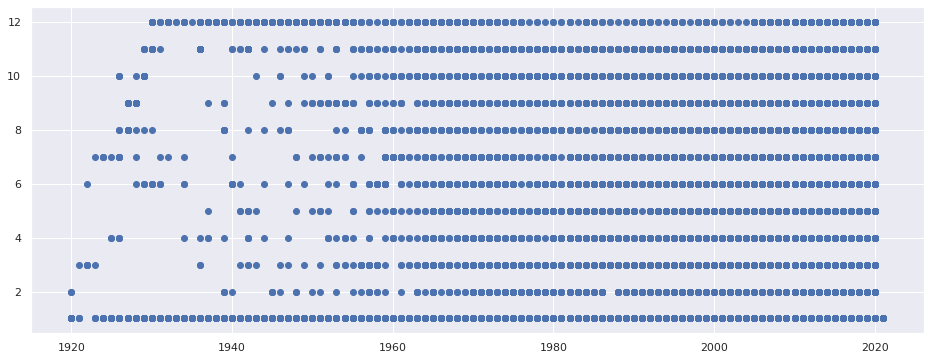

In [75]:
plt.scatter(y=df.month,x=df.year)

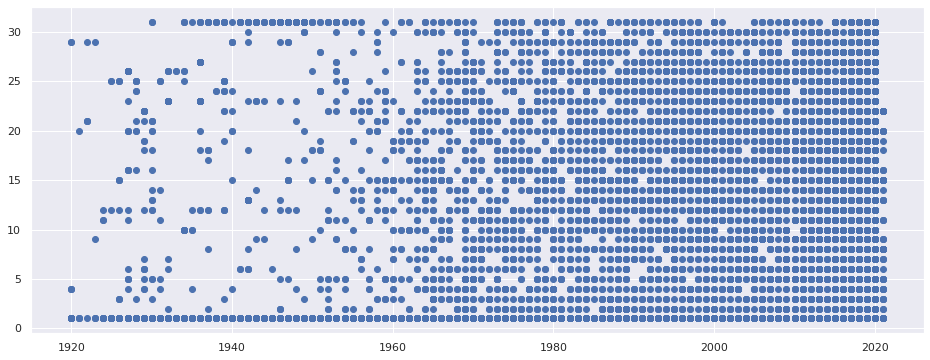

In [76]:
plt.scatter(y=df.date,x=df.year)

###valence

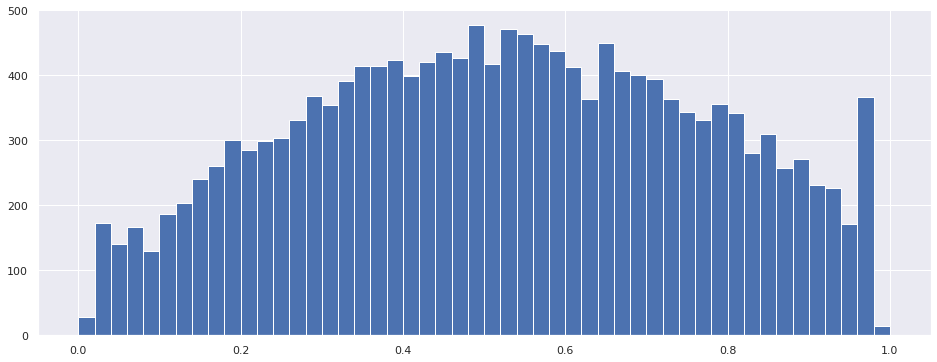

In [77]:
plt.hist(df.valence,bins=50)
plt.show()

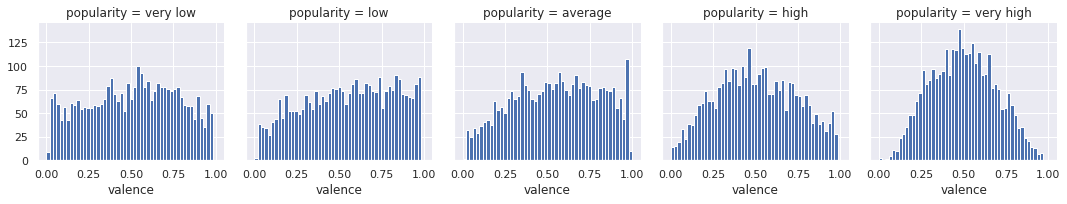

In [78]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'valence',bins=50)

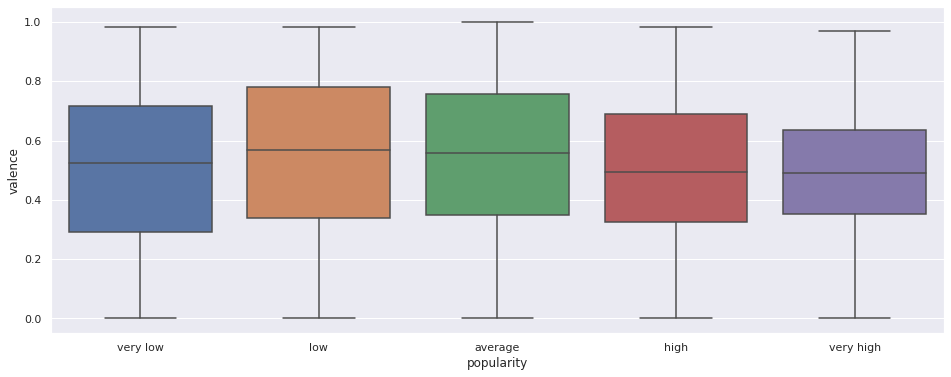

In [79]:
sns.boxplot(x=df['popularity'],y=df['valence'])

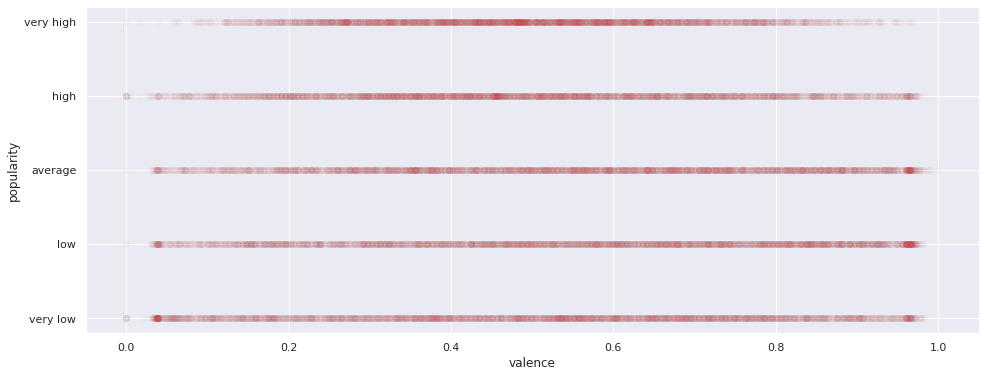

In [80]:
scatter_plot('valence','popularity')

###add obs btw duration

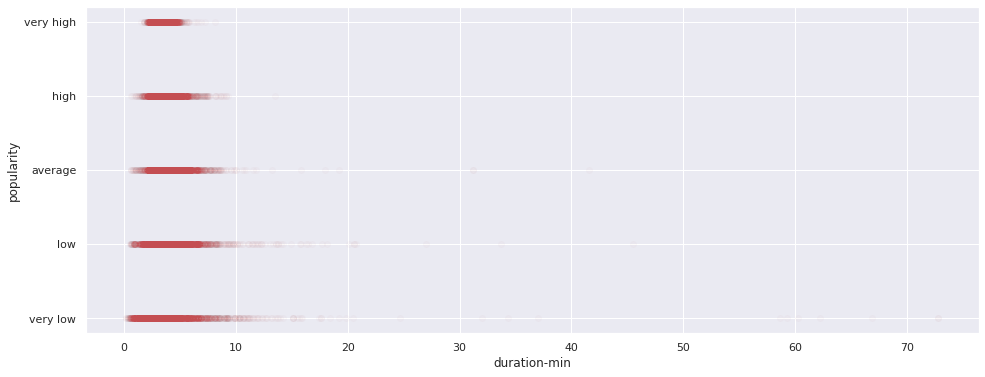

In [81]:
plt.figure()
plt.scatter(df['duration-min'],df['popularity'],alpha=.02,c='r')
plt.xlabel('duration-min')
plt.ylabel('popularity')
plt.show()

(0.0, 8.0)

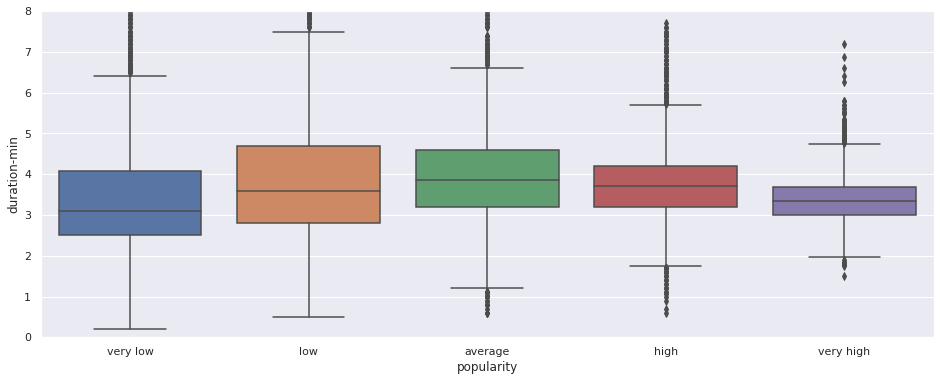

In [82]:
sns.boxplot(x=df['popularity'],y=df['duration-min'])
plt.ylim(0,8)

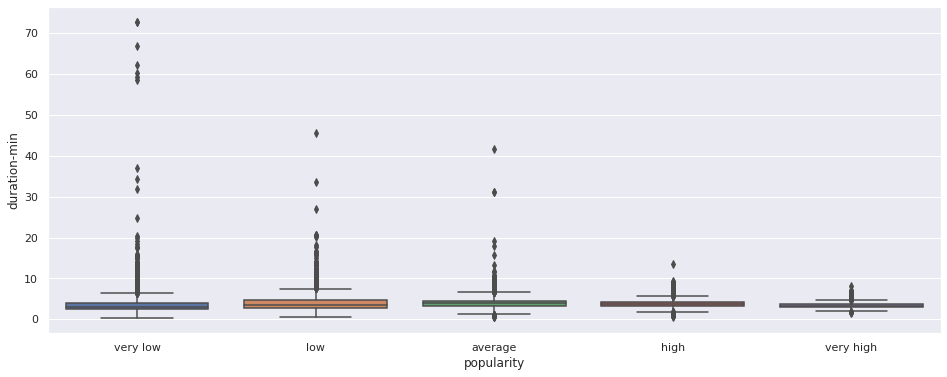

In [83]:
sns.boxplot(x=df['popularity'],y=df['duration-min'])

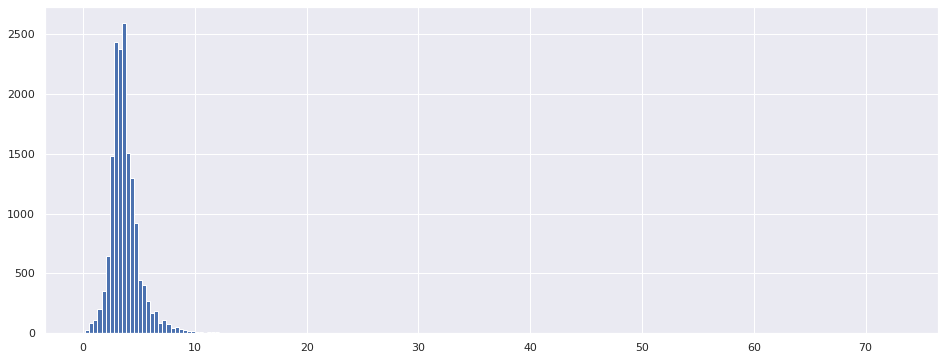

In [84]:
plt.hist(df['duration-min'],bins=200)
plt.show()

:: duration of music

it is distintly observed that there is a generic trend of lower duration music being more popular

moreover the high popularity music are much consized in the interval near 3 min duration

###liveness

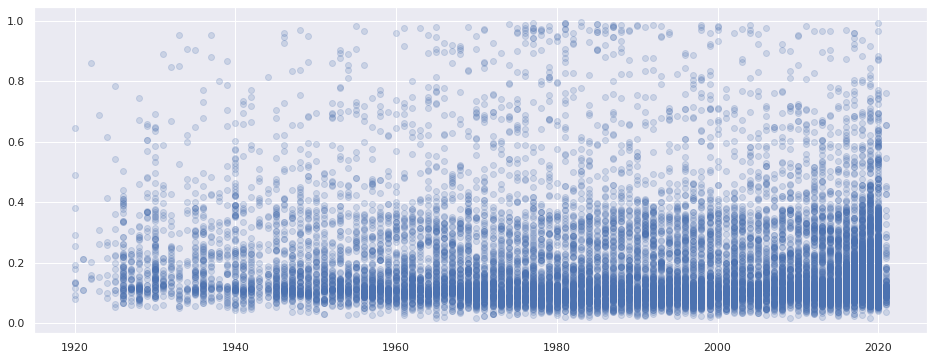

In [85]:
plt.scatter(x=df.year,y=df.liveness,alpha=.2)

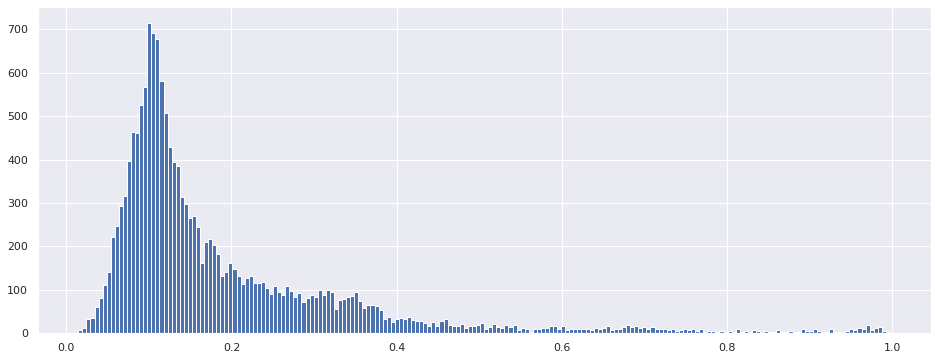

In [86]:
plt.hist(df['liveness'],bins=200)
plt.show()

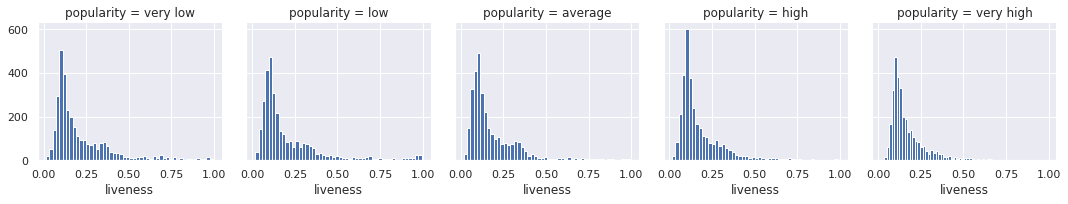

In [87]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'liveness',bins=50)

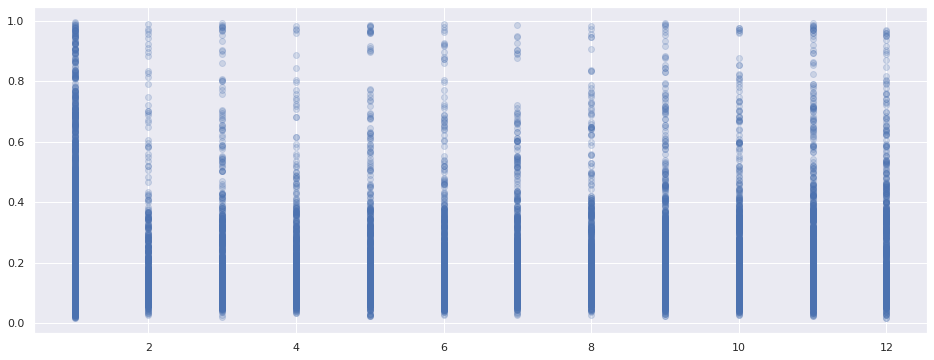

In [88]:
plt.scatter(x=df.month,y=df.liveness,alpha=.2)

###speechiness

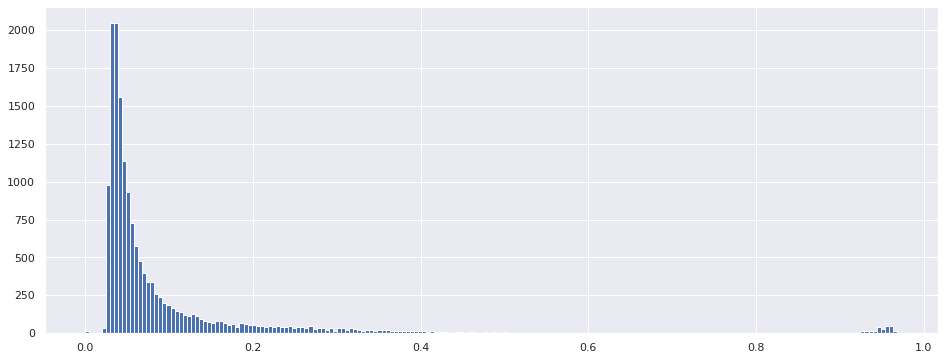

In [89]:
plt.hist(df['speechiness'],bins=200)
plt.show()

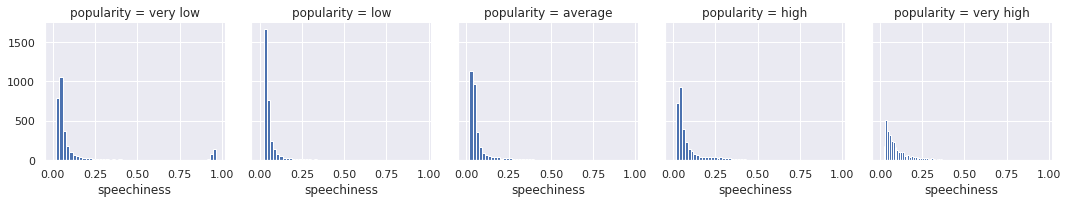

In [90]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'speechiness',bins=50)

###key

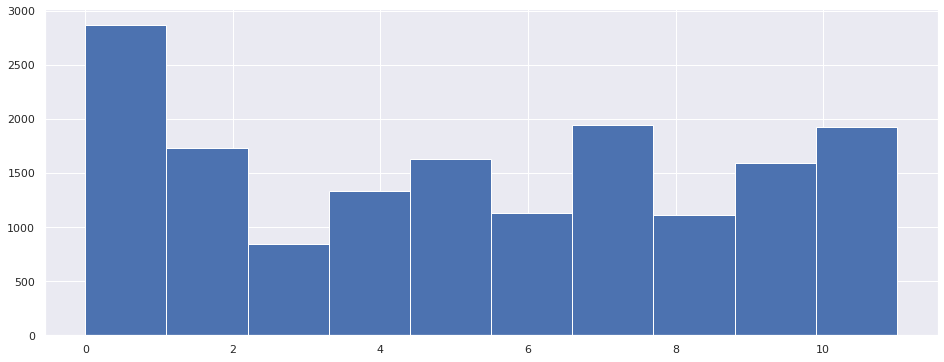

In [91]:
plt.hist(df.key)
plt.show()

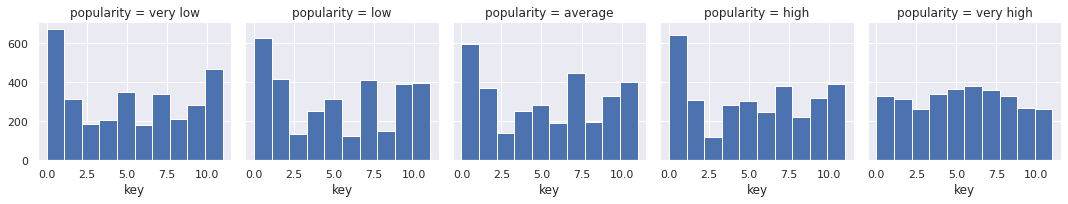

In [92]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'key')

###tempo

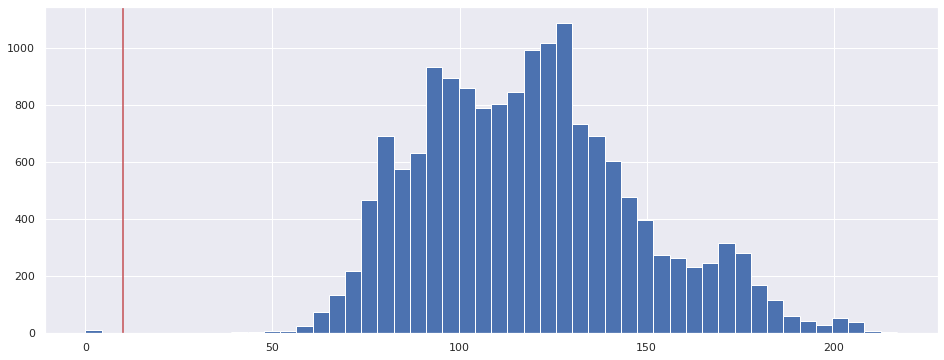

In [93]:
plt.hist(df['tempo'],bins=50)
plt.axvline(10,c='r')
plt.show()

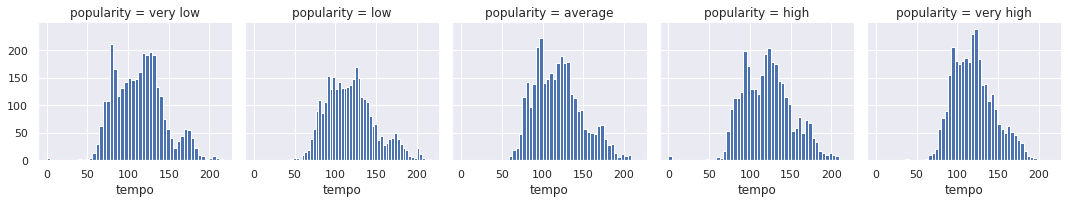

In [94]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'tempo',bins=50)

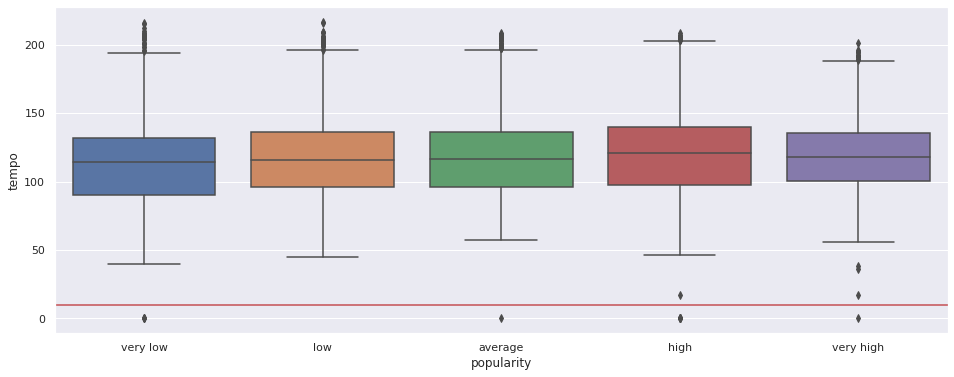

In [95]:
sns.boxplot(x=df['popularity'],y=df['tempo'])
plt.axhline(10,c='r')

In [96]:
print(df[df.tempo<10].shape)

(13, 18)


(array([  2.,   0.,   0.,   0.,   1.,   3.,   2.,   5.,   9.,   8.,  33.,
         68., 126., 192., 367., 604., 595., 480., 778., 879., 842., 727.,
        703., 768., 753., 931., 946., 934., 798., 652., 618., 488., 410.,
        312., 243., 242., 220., 230., 292., 276., 167., 113.,  80.,  45.,
         32.,  38.,  45.,  28.,   7.,   4.]),
 array([ 17.19270966,  21.18571546,  25.17872127,  29.17172708,
         33.16473288,  37.15773869,  41.1507445 ,  45.14375031,
         49.13675611,  53.12976192,  57.12276773,  61.11577353,
         65.10877934,  69.10178515,  73.09479095,  77.08779676,
         81.08080257,  85.07380837,  89.06681418,  93.05981999,
         97.05282579, 101.0458316 , 105.03883741, 109.03184321,
        113.02484902, 117.01785483, 121.01086064, 125.00386644,
        128.99687225, 132.98987806, 136.98288386, 140.97588967,
        144.96889548, 148.96190128, 152.95490709, 156.9479129 ,
        160.9409187 , 164.93392451, 168.92693032, 172.91993612,
        176.912941

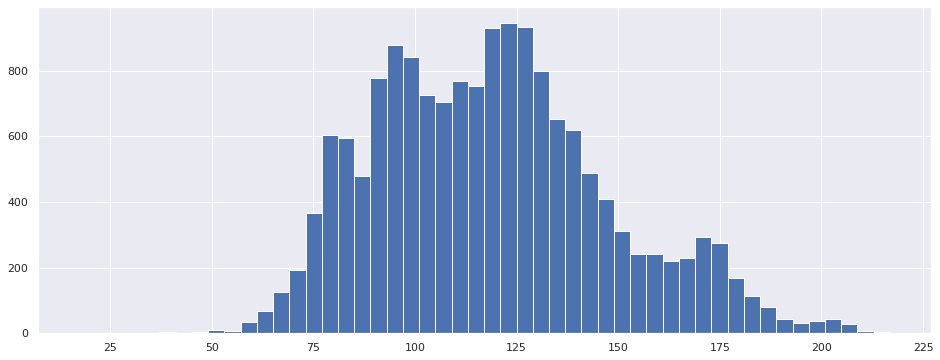

In [97]:
## outliners
df4=df[df.tempo>10].copy()
plt.hist(df4['tempo'],bins=50)

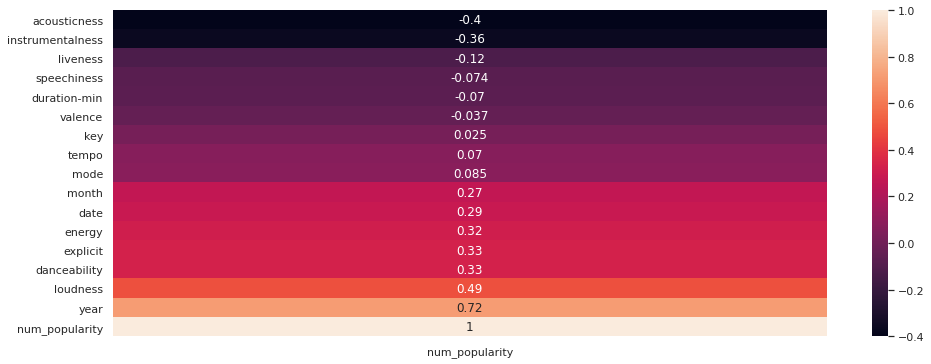

In [98]:
sns.heatmap(df4.corr()[['num_popularity']].sort_values(['num_popularity']),annot=True)

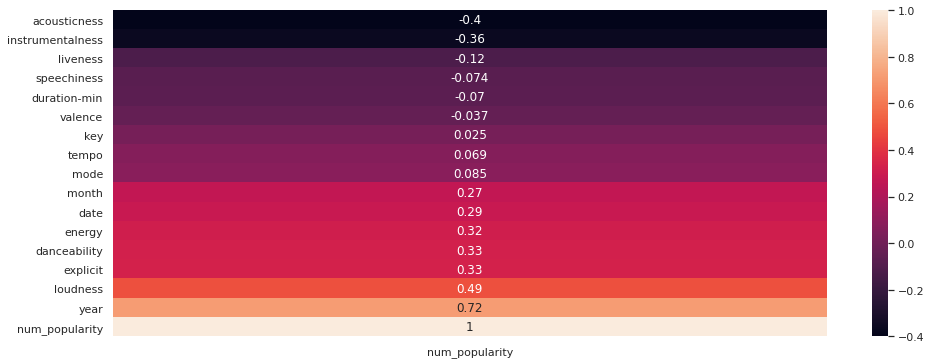

In [99]:
sns.heatmap(df.corr()[['num_popularity']].sort_values(['num_popularity']),annot=True)

In [100]:
X=df4.drop(columns=['popularity','num_popularity']).copy()
y=df4['popularity'].copy()
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=69,shuffle=True)
model=RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',max_depth=4,random_state=69)
model.fit(x_train,y_train)
y_pred_f=model.predict(x_test)
y_true_f=y_test.copy()
score=0
print(f1_score(y_true_f,y_pred_f,average='macro'))
print(accuracy_score(y_true_f,y_pred_f))

0.5386807605572722
0.565527950310559


###mode

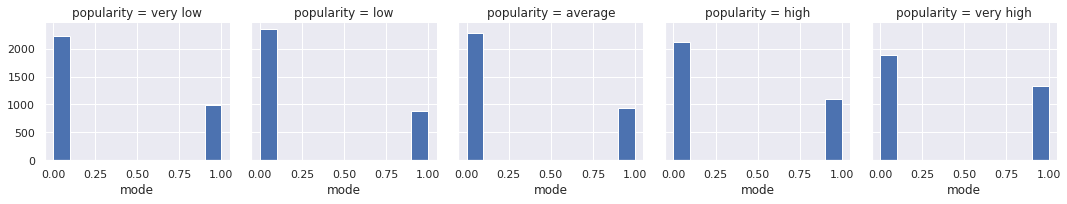

In [101]:
g=sns.FacetGrid(df, col='popularity')
g=g.map(plt.hist,'mode')

In [102]:
print('1',df[df['num_popularity']==1]['mode'].sum()*100/ len(df[df['num_popularity']==1]))
print('2',df[df['num_popularity']==2]['mode'].sum()*100/ len(df[df['num_popularity']==2]))
print('3',df[df['num_popularity']==3]['mode'].sum()*100/ len(df[df['num_popularity']==3]))
print('4',df[df['num_popularity']==4]['mode'].sum()*100/ len(df[df['num_popularity']==4]))
print('5',df[df['num_popularity']==5]['mode'].sum()*100/ len(df[df['num_popularity']==5]))
print('\nall',df['mode'].sum()*100/ len(df))

1 30.943513345747984
2 27.16547656007451
3 28.98820608317815
4 34.10924891371819
5 41.527001862197395

all 32.54702340306661


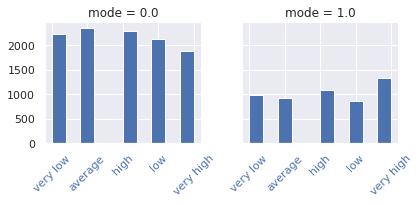

In [103]:
g=sns.FacetGrid(df,col='mode')
g=g.map(plt.hist,'popularity')
g=g.map(plt.xticks,rotation=45)

# save

In [104]:
df3.to_csv("preprocessed_train.csv")